# Credit Card Fraud Detection 

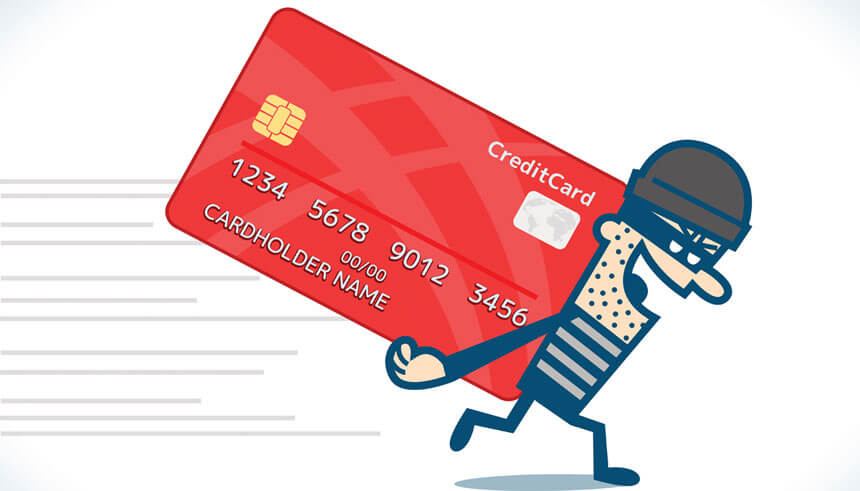

## Credit Card Fraud Detection 

* Load dataset
* Inspecting the dataset
* Preprocessing the data
* Preprocessing & Data Viz
* Fitting the model and Making predictions  
* Making predictions and evaluating performance
* Display model

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [ ]:
df.head()

In [ ]:
df['Class'].value_counts()


In [ ]:
# SHUFFLING THE ROWS OF THE DF

df = df.sample(frac = 1, random_state = 1)
df = df.reset_index(drop = True)
df.head()


In [ ]:
as_np = df.to_numpy()
index = int(len(as_np)* .92)
x_train,y_train = as_np[:index,:-1],as_np[:index,-1]
x_test,y_test = as_np[index:, :-1], as_np[index:, -1]
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train,y_train)
test_predictions = model.predict(x_test)
pd.value_counts(test_predictions)

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

* ### ✔️  𝑇𝑟𝑢𝑒   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒  =  𝐼𝑠   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒 ,  𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒 
* ### ❌  𝐹𝑎𝑙𝑠𝑒   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒  =  𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒 ,  𝐼𝑠   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒 
* ### ❌  𝐹𝑎𝑙𝑠𝑒   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒  =  𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒 ,  𝐼𝑠   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒 
* ### ✔️  𝑇𝑟𝑢𝑒   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒  =  𝐼𝑠   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒 ,  𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒 

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)

### 𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦  =  𝑇𝑃+𝑇𝑁/𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁 

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

### 𝑅𝑒𝑐𝑎𝑙𝑙  =  𝑆𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑖𝑡𝑦  =  𝑇𝑟𝑢𝑒   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒   𝑅𝑎𝑡𝑒  =  𝑇𝑃/(𝑇𝑃+𝐹𝑁)

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

### 𝐹𝑎𝑙𝑠𝑒   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒   𝑅𝑎𝑡𝑒  =  𝐹𝑁/(𝑇𝑃+𝐹𝑁 )

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

In [ ]:
"True Positive Rate + False Negative Rate: {0}".format(tpr(tn, fp, fn, tp) + fnr(tn, fp, fn, tp))

### 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡𝑦  =  𝑇𝑟𝑢𝑒   𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒   𝑅𝑎𝑡𝑒  =  𝑇𝑁(𝑇𝑁+𝐹𝑃)

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"True Negative Rate: {0}".format(tnr(tn, fp, fn, tp))

### 𝐹𝑎𝑙𝑠𝑒   𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒   𝑅𝑎𝑡𝑒  =  𝐹𝑃(𝑇𝑁+𝐹𝑃 )

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

In [ ]:
"True Negative Rate + False Positive Rate: {0}".format(tnr(tn, fp, fn, tp) + fpr(tn, fp, fn, tp))

### 𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛  =  𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒   𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑣𝑒   𝑉𝑎𝑙𝑢𝑒  =  𝑇𝑃(𝑇𝑃+𝐹𝑃) 

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

### 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑣𝑒 𝑉𝑎𝑙𝑢𝑒 =  𝑇𝑁(𝑇𝑁+𝐹𝑁)

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

### 𝐵𝑎𝑙𝑎𝑛𝑐𝑒𝑑   𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦  =  (𝑇𝑃𝑅+𝑇𝑁𝑅)/2 

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

### 𝐹1 =  2∗𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑐𝑖𝑜𝑛∗𝑅𝑒𝑐𝑎𝑙𝑙 / (𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙)

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(x_test)[:, 1]

probabilities

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float64)

thresholds

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px
px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')



In [ ]:
# Report AUC

from sklearn.metrics import auc

auc(fprs, tprs)

In [ ]:
from math import sqrt

def mcc(tn, fp, fn, tp):
  top = (tp * tn) - (fp * fn)
  bot = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
  return top / sqrt(bot)

"Matthews Correlation Coefficient: {0}".format(mcc(tn, fp, fn, tp))

In [ ]:
# Need actuals, predictions, and prediction probabilities

y_test.shape, test_predictions.shape, probabilities.shape

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions, labels=[0, 1], target_names=['Not Fraud', 'Fraud']))

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, test_predictions)

In [ ]:
# ROC & AUC

from sklearn.metrics import RocCurveDisplay, roc_curve

fprs, tprs, thresholdss = roc_curve(y_test, probabilities)
roc_auc = auc(fprs, tprs)
display = RocCurveDisplay(fpr=fprs, tpr=tprs, roc_auc=roc_auc)
display.plot()